In [1]:
import pickle
import pandas as pd
import numpy as np
from statsbombpy import sb
import seaborn as sns
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from one_two.functions import get_team_info, plot_one_two_heatmaps, get_player_one_twos, key_one_two_percentage
pd.set_option("display.max_columns", None)

In [2]:
with open("data/WSL_20_21_all_one_twos.pickle", "rb") as f:
    one_twos = pickle.load(f)

In [3]:
# put it in a single df
one_twos_aggregated = pd.DataFrame([])
for key in one_twos.keys():
    one_twos_aggregated = pd.concat([one_twos_aggregated, one_twos[key]], axis=0)

In [27]:
one_twos_aggregated

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure,time_in_secs,x_start,y_start,x_end,y_end,dribble_overrun,injury_stoppage_in_chain,clearance_other,goalkeeper_shot_saved_off_target,shot_deflected,shot_saved_off_target,foul_committed_offensive,foul_committed_penalty,foul_won_penalty,miscontrol_aerial_won,shot_redirect,ball_recovery_offensive,block_save_block,goalkeeper_success_in_play,bad_behaviour_card,dribble_no_touch,shot_follows_dribble,goalkeeper_saved_to_post,half_start_late_video_start,goalkeeper_shot_saved_to_post,shot_saved_to_post,goalkeeper_lost_out,goalkeeper_lost_in_play
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.091719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,765d4ed1-bcb3-4313-a176-a9993db11767,263,NaN,"[120.0, 0.1]",3775648,5,NaN,NaN,NaN,2.567288,NaN,Right Foot,NaN,NaN,NaN,"[111.5, 5.6]",NaN,Ground Pass,NaN,10.124228,NaN,NaN,NaN,NaN,Katie McCabe,NaN,NaN,NaN,NaN,NaN,Corner,1,From Corner,Bethany Mead,15619.0,Center Forward,11,Arsenal WFC,968,[870653a7-df88-4d1f-9787-c0df438f9998],12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arsenal WFC,968,00:05:12.977,Pass,NaN,312,120.0,0.1,111.5,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.735411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e5a83b17-eb20-4f82-b4d9-4e092b1cc684,266,NaN,"[111.5, 5.6]",3775648,5,NaN,NaN,NaN,0.880005,NaN,Left Foot,NaN,NaN,NaN,"[117.7, 13.1]",NaN,Ground Pass,NaN,9.730879,NaN,NaN,NaN,NaN,Bethany Mead,NaN,NaN,NaN,NaN,NaN,NaN,1,From Corner,Katie McCabe,15620.0,Left Back,11,Arsenal WFC,968,[cff28b43-c386-4836-9168-b232cb41043d],15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arsenal WFC,968,00:05:15.638,Pass,NaN,315,111.5,5.6,117.7,13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.033475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9cb9ce39-8472-4313-b31c-b1828ccf06ad,361,NaN,"[48.2, 5.8]",3775648,7,NaN,NaN,NaN,-0.190977,NaN,Left Foot,NaN,NaN,NaN,"[63.2, 2.9]",NaN,Ground Pass,NaN,15.277761,NaN,NaN,NaN,NaN,Jordan Nobbs,NaN,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Katie McCabe,15620.0,Left Back,14,Arsenal WFC,968,[94e9d478-9a11-4a6a-8bdd-ec71351e6809],32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arsenal WFC,968,00:07:32.550,Pass,NaN,452,48.2,5.8,63.2,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.214850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,884

In [4]:
# split into opening and closing passes
open_agg = one_twos_aggregated.iloc[::2, :]

close_agg = one_twos_aggregated.iloc[1::2, :]

In [5]:
open_counts = open_agg.player.value_counts()
open_counts = open_counts.reset_index()

# add team info
open_counts = get_team_info(open_counts, open_agg)

close_counts = close_agg.player.value_counts()
close_counts = close_counts.reset_index()

close_counts = get_team_info(close_counts, close_agg)


/tmp/ipykernel_92669/2431070817.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_10["surname"] = surnames
/tmp/ipykernel_92669/2431070817.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_10["surname"] = surnames


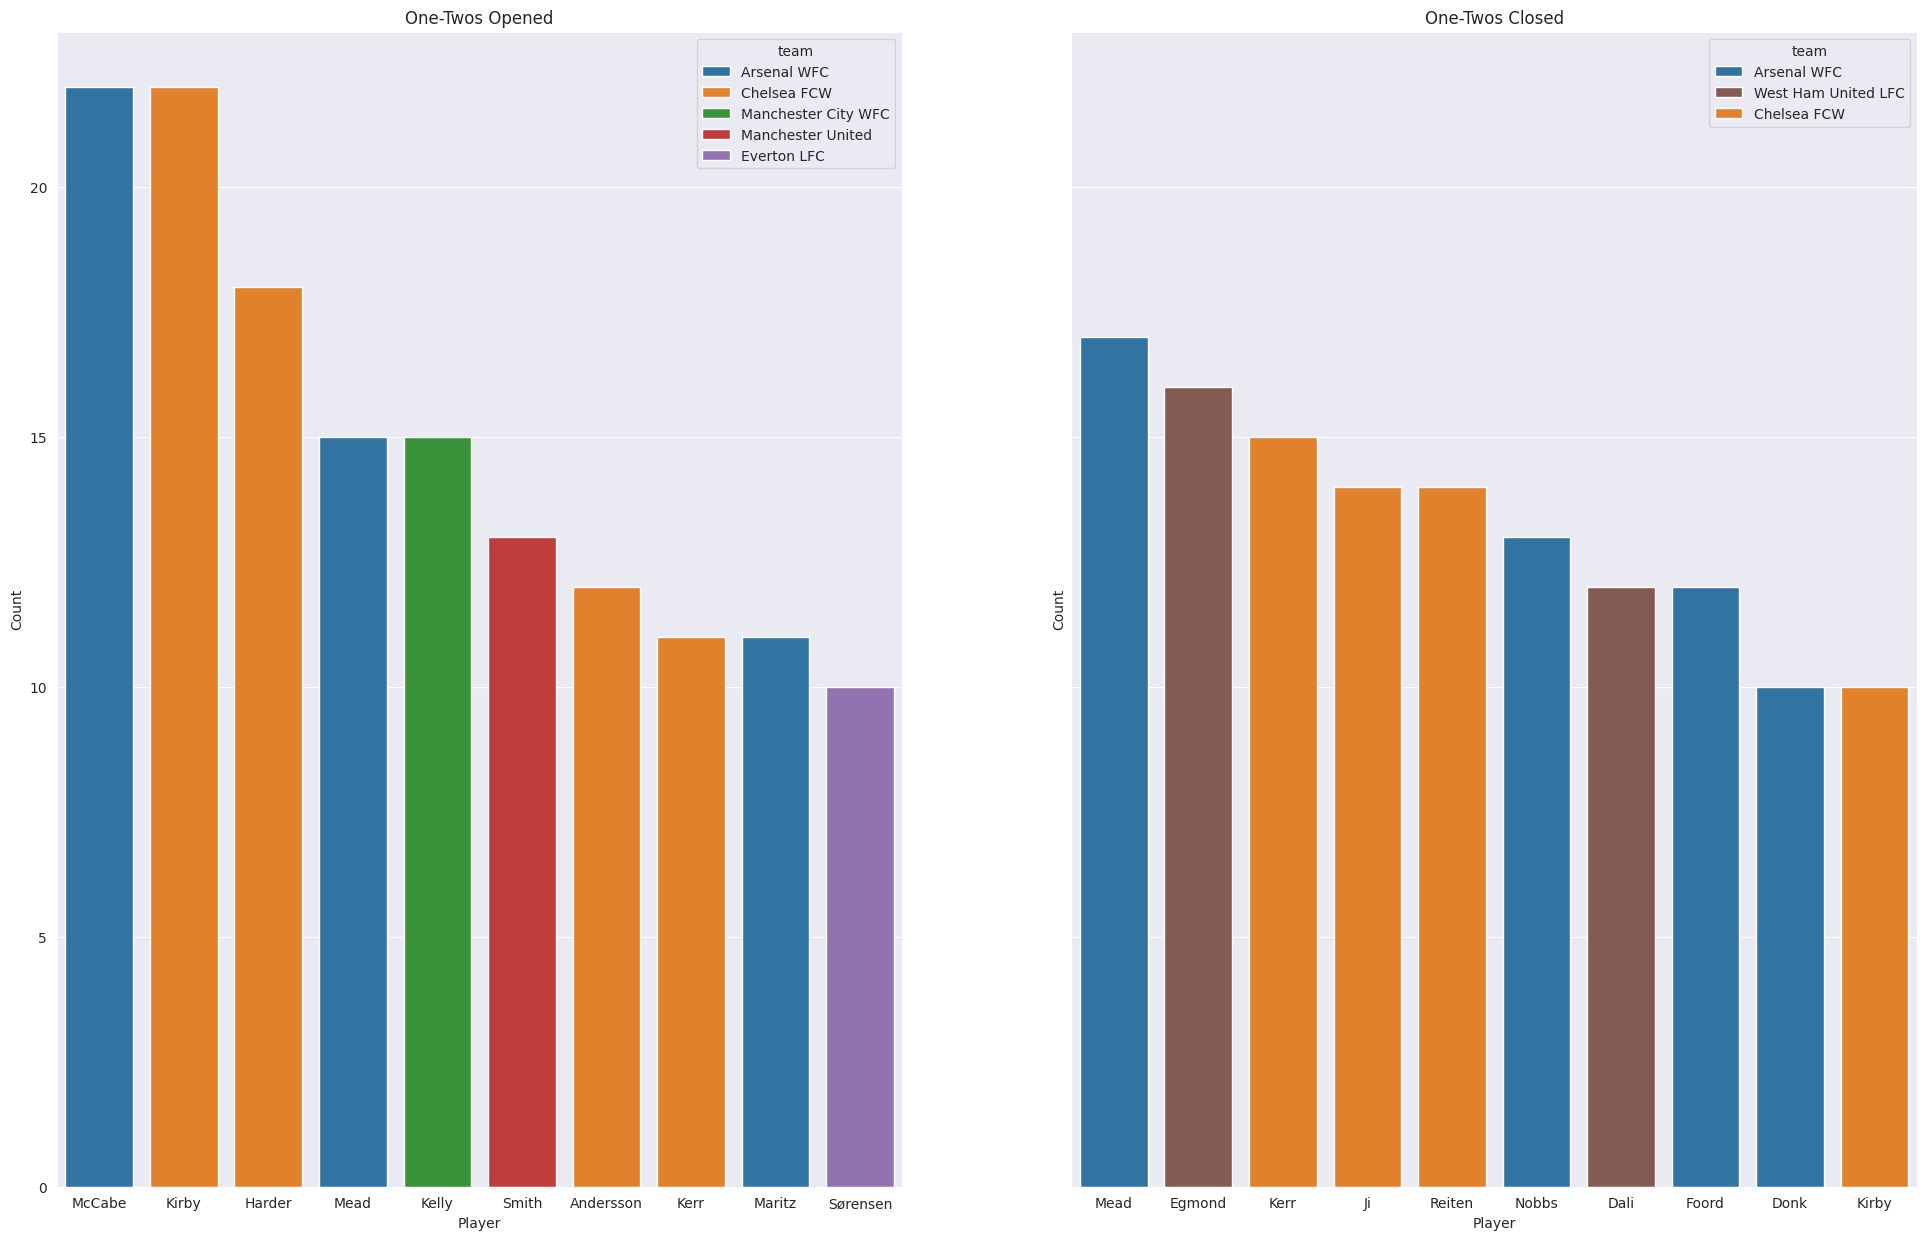

In [13]:
# plot open and close in subplots - TOP 10 only
top_n = 10
open_10 = open_counts.iloc[:top_n, :]
close_10 = close_counts.iloc[:top_n, :]

# use surnames only for top 10
surnames = []
for player in open_10.player:
    surnames.append(player.split(" ")[-1])

open_10["surname"] = surnames

surnames = []
for player in close_10.player:
    surnames.append(player.split(" ")[-1])

close_10["surname"] = surnames

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(24,15))
# plt.title("Players With Most One-Two Passes Per Team (WSL 20/21)")

# make color dict
unique = open_counts["team"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
sns.barplot(x="surname", y="count", data=open_10, hue="team", palette=palette, ax=ax[0], dodge=False)
ax[0].set_title("One-Twos Opened")
sns.barplot(x="surname", y="count", data=close_10, hue="team", palette=palette, ax=ax[1], dodge=False)
ax[1].set_title("One-Twos Closed")
ax[0].set_xlabel("Player")
ax[1].set_xlabel("Player")
# ax[0].tick_params(axis='x', rotation=70)
# ax[1].tick_params(axis='x', rotation=70)
ax[0].set_ylabel("Count")
ax[1].set_ylabel("Count")
plt.savefig(f"slide_plots/open_close_bar_top{top_n}.png")
plt.show()

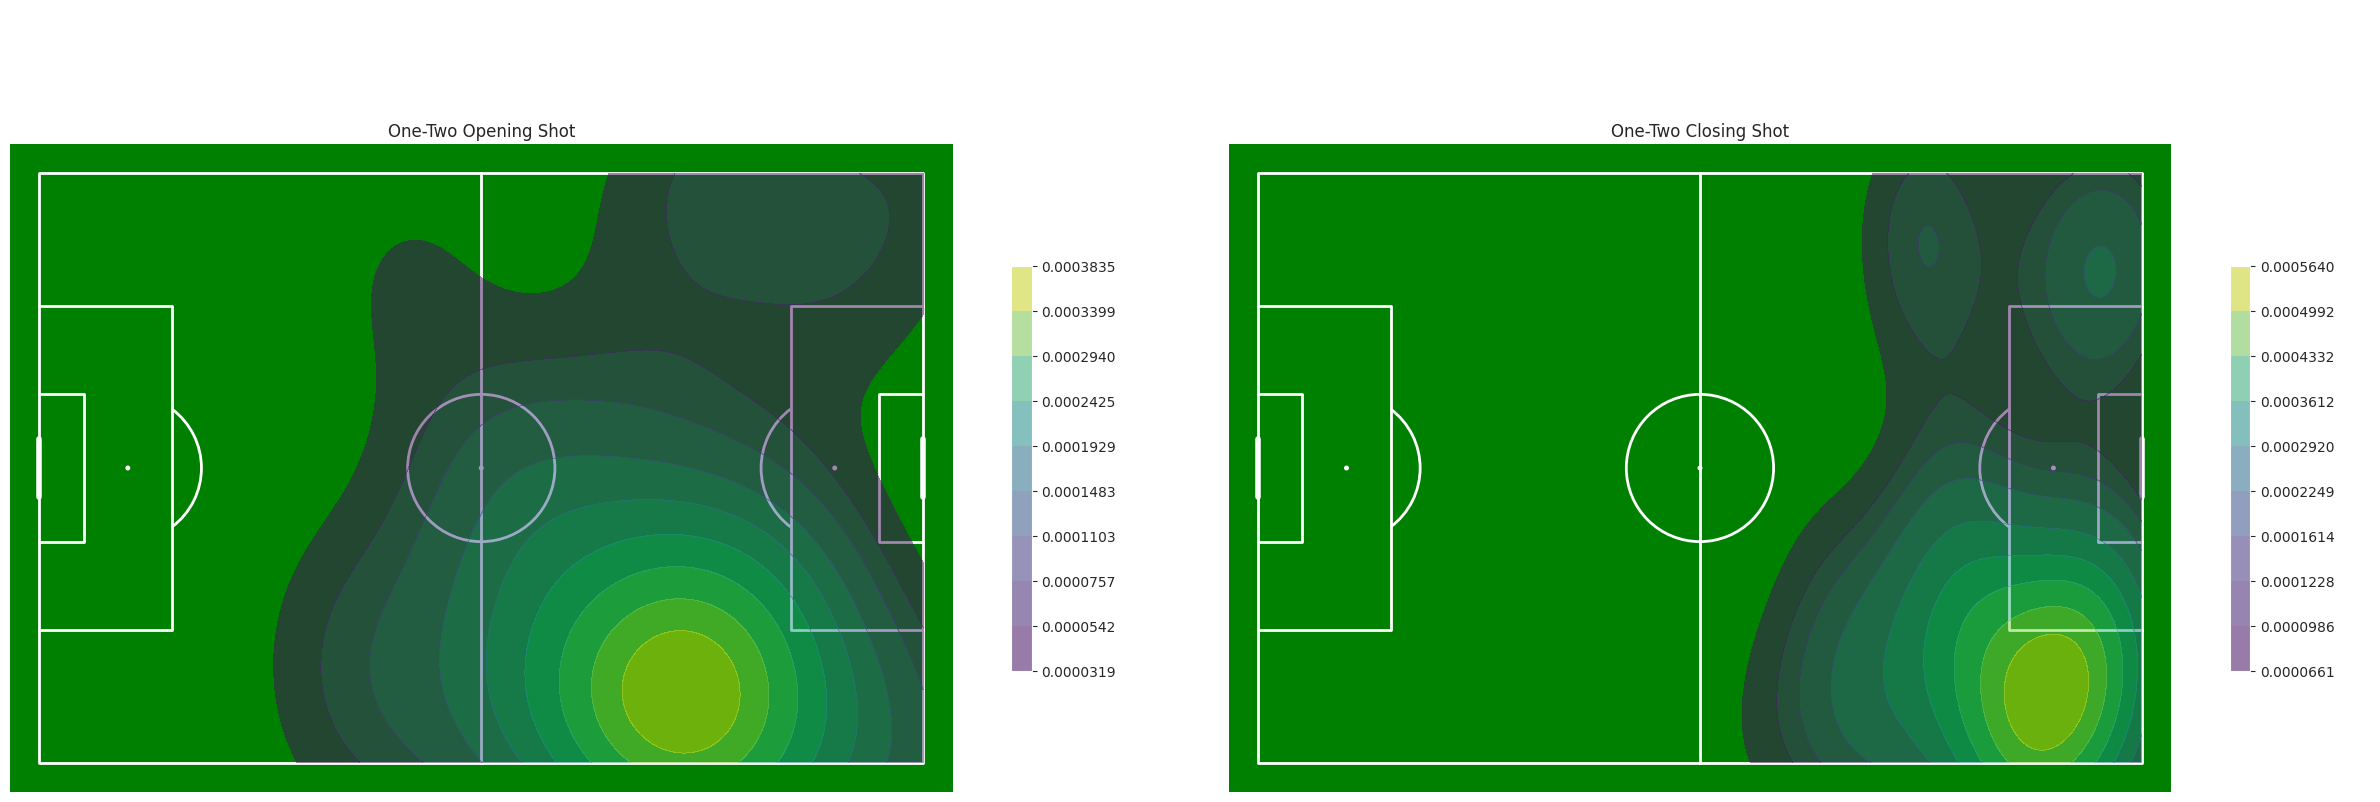

<Figure size 1200x800 with 0 Axes>

In [14]:
# plot heatmap for beth mead

# make df of 1-2's for BM
BM_data = get_player_one_twos("Bethany Mead", one_twos_aggregated)

plot_one_two_heatmaps(data=BM_data, competition="WSL", season="2021", team="BM")

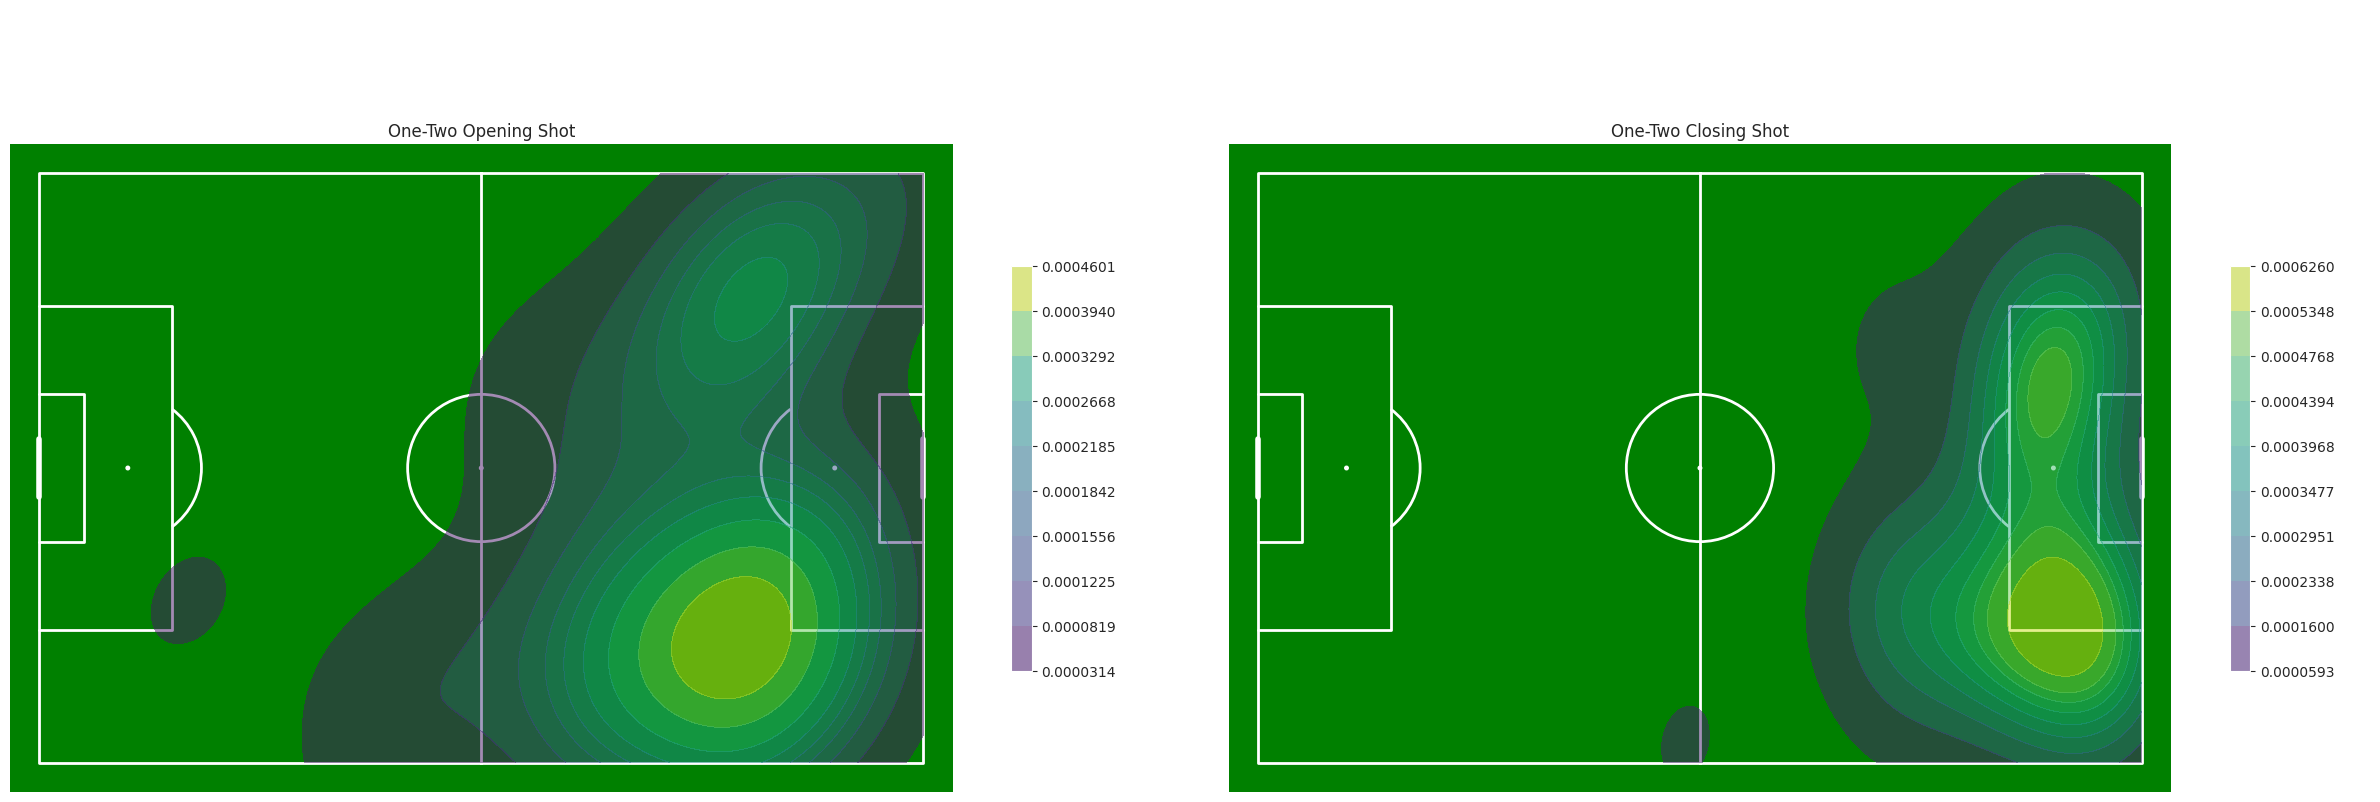

<Figure size 1200x800 with 0 Axes>

In [15]:
# plot heatmap for fran kirby

FK_data = get_player_one_twos("Francesca Kirby", one_twos_aggregated)

plot_one_two_heatmaps(data=FK_data, competition="WSL", season="2021", team="FK")

In [16]:
top_10 = list(set([player for player in open_10.player] + [player for player in close_10.player]))

player_data = {}
pcs = []
for player in top_10:
    player_data[player] = get_player_one_twos(player, one_twos_aggregated)


In [17]:
one_two_counts = open_counts.merge(close_counts, on="player", how="outer").rename(columns={"count_x": "open_count", "count_y": "close_count", "team_x": "team"})
one_two_counts.drop(columns=["team_y"])

# add a total count col
one_two_counts["total_count"] = one_two_counts["open_count"]+one_two_counts["close_count"]

# take only players in top 10 open or close:
# idx = [i for i in range(len(one_two_counts)) if one_two_counts["player"].iloc[i] in top_10]
# one_two_10 = one_two_counts.iloc[idx,:]
one_two_10 = one_two_counts.head(10)

In [18]:
# get key pass percentage for each top 10 player
pcs = []
for player in one_two_10.player:
    pc = key_one_two_percentage(player_data[player])
    pcs.append(pc)

one_two_10["key_pc"] = pcs

/tmp/ipykernel_92669/1833157995.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_two_10["key_pc"] = pcs


/tmp/ipykernel_92669/1836482136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_two_10["surname"] = surnames


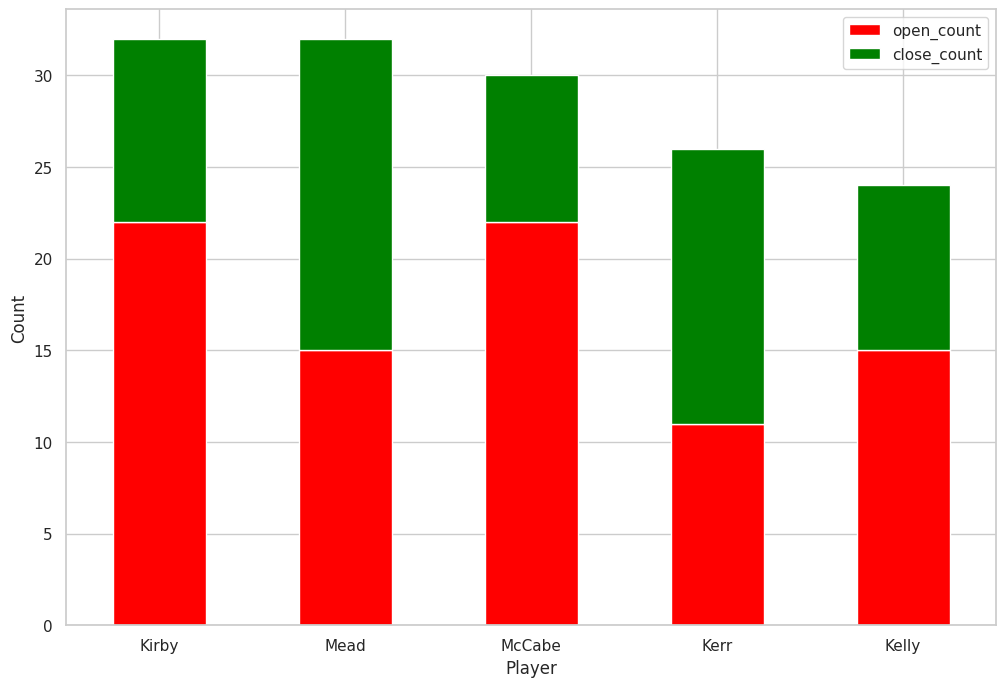

In [83]:
# stacked bar plot for total count
# TODO - make into stack plot
# use surnames only
surnames = []
for player in one_two_10.player:
    surnames.append(player.split(" ")[-1])

one_two_10["surname"] = surnames

fig, ax = plt.subplots(figsize=(12,8))
# plt.title("Players With Most One-Two Passes Per Team (WSL 20/21)")

# make color dict
unique = one_two_counts["team"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
# sns.barplot(x="surname", y="total_count", data=one_two_10.head(5), hue="team", palette=palette, ax=ax, dodge=False)
# ax.set_title("Total One-Twos")
# ax.set_xlabel("Player")
# ax.set_ylabel("Count")
# plt.savefig(f"slide_plots/open_close_stack_top{top_n}.png")
# plt.show()
one_two_10.sort_values(by="total_count", ascending=False).head(5).set_index("surname")[["open_count","close_count"]].plot(kind="bar",stacked=True, color=["red", "green"], ax=ax)
plt.savefig(f"slide_plots/open_close_stack_top{top_n}.png")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.xlabel("Player")
plt.show()


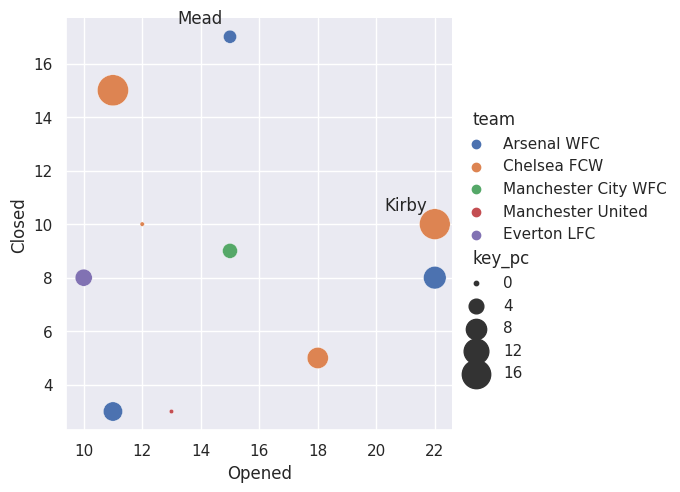

In [25]:
# plot opening against closing, scatter plot size = key pass percentage
sns.set(rc={"figure.figsize": (20,15)})

p = sns.relplot(x="open_count", y="close_count", data=one_two_10, hue="team", size="key_pc", sizes=(10,500))
ax = p.axes[0,0]
# ax.set_title("One-Twos Opened and Closed\n WSL 20/21\n")
ax.set_xlabel("Opened")
ax.set_ylabel("Closed")

for idx, row in one_two_10.iterrows():
    x = row[1]
    y = row[3]
    name = row[0]
    if name=="Bethany Mead" or name=="Francesca Kirby":
        ax.text(x-0.25, y+0.5, name.split(" ")[-1], horizontalalignment='right')
plt.savefig("slide_plots/WSL_open_v_closed_key.png")
plt.show()

In [58]:
def get_match_events(match_ID, one_two_IDs):
    # load match events
    match = sb.events(match_id=match_ID)

    # initialise list
next_event_id = []

# loop through all events in match
for i in range(len(match)):
    # get event id
    event = match["id"].iloc[i]
    # if that event is a one-two closing pass ...
    if event in one_two_ids.values:
        if match["type"].iloc[i+1] == "Pass" and not np.isnan(match["pass_shot_assist"].iloc[i+1]):
            # ... then store the index of the next pass IF the next pass is a key pass
            next_event_id.append(match["id"].iloc[i+1])
        elif match["type"].iloc[i+1] == "Pass" and not np.isnan(match["pass_goal_assist"].iloc[i+1]):
            next_event_id.append(match["id"].iloc[i+1])

    return next_event_idx

In [59]:
for matchid in BM_data.match_id.unique():
    one_two_ids = BM_data["id"].iloc[1::2]
    print(len(get_match_events(match_ID=matchid, one_two_IDs=one_two_ids)))

0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1


In [69]:
# check function
match_ID = BM_data.match_id.unique()[1]
match = sb.events(match_id=match_ID)

# initialise list
next_event_id = []

# loop through all events in match
for i in range(len(match)):
    # get event id
    event = match["id"].iloc[i]
    # if that event is a one-two closing pass ...
    if event in one_two_ids.values:
        if match["type"].iloc[i+1] == "Pass" and not np.isnan(match["pass_shot_assist"].iloc[i+1]):
            # ... then store the index of the next pass IF the next pass is a key pass
            next_event_id.append(match["id"].iloc[i+1])
        elif match["type"].iloc[i+1] == "Pass" and not np.isnan(match["pass_goal_assist"].iloc[i+1]):
            next_event_id.append(match["id"].iloc[i+1])

match[match["id"]==next_event_id[0]]

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.253707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eb2a49a6-2d4e-4eba-b1ed-7717781a8ec1,142,NaN,NaN,"[113.2, 64.5]",3775609,2,NaN,NaN,NaN,-1.554131,f83f9868-1d43-4e9d-886e-ab832080afd7,Right Foot,True,NaN,NaN,"[113.6, 40.5]",NaN,High Pass,NaN,24.003334,NaN,NaN,NaN,Caitlin Jade Foord,True,NaN,NaN,NaN,NaN,1,From Kick Off,Noelle Maritz,10404.0,Right Back,2,Arsenal WFC,968,"[05114b46-1bea-494b-a276-a35bf3e800d4, db2705b...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arsenal WFC,968,00:02:01.912,Pass,True


In [55]:
next_event_idx

[]

In [ ]:
# function to retrieve next event given a one-two closing pass

# given players one-two dataframe, get match id, then go to one_two df and find closing pass event id. then choose next event (i.e. next row)
# then check if next event is a key pass (shot or goal assist)
# add extra column to players df with values ["key pass", "leads to key pass"]

for i in range(len(BM_data))[:2]:
    # get closing passes
    BM_closes = BM_data.iloc[1::2]
    match = BM_closes["match_id"].iloc[i]
    all_match_events = one_twos[f"{match}"]

    # find closing pass in all_match_events


In [ ]:
# for each match ...
for match in BM_closes.match_id.unique()[1:2]:
    # ... get all events
    all_events = one_twos[f"{match}"]
    # extract ids
    event_ids = all_events["id"].values

    # then get all one-two closing passes
    match_one_twos = BM_closes[BM_closes["match_id"]==match]
    one_two_ids = match_one_twos["id"].values

    # find index of this pass in the df of all events
    # one_two_next = all_events[]

In [ ]:
match_one_twos_idx = match_one_twos.set_index("id")
all_events_idx = all_events.set_index("id")